In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

# Load image and transformation

In [ ]:
#Load image
img = cv2.imread('rick.png')

In [ ]:
# Transform BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

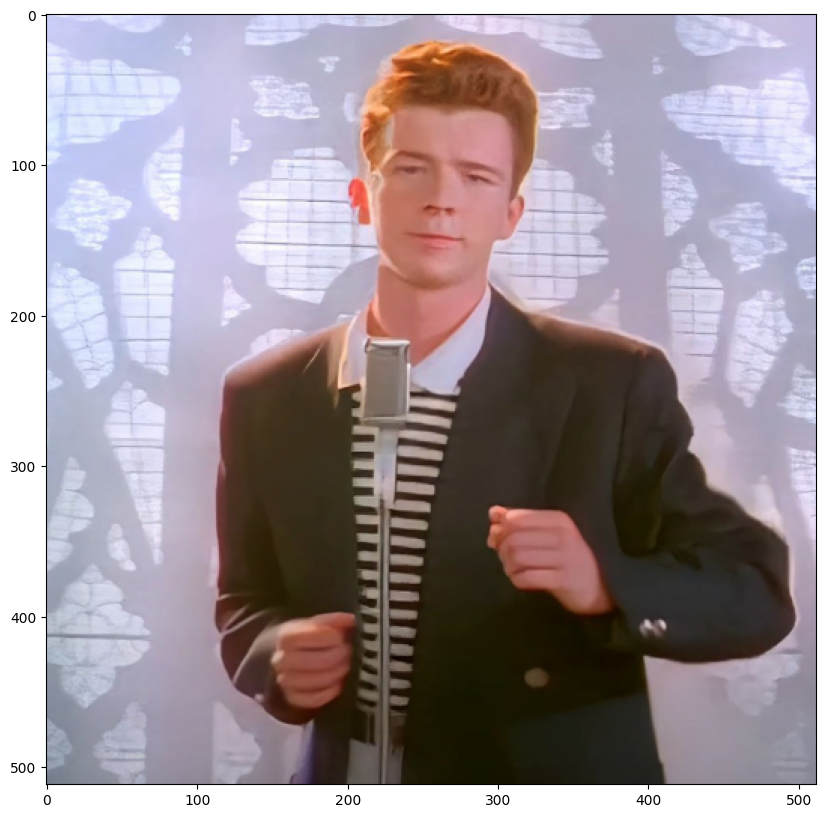

In [ ]:
# Display image
plt.figure(figsize=(10, 10))  # Set the figure size
plt.imshow(img_rgb)
#plt.axis('off') 
plt.show()

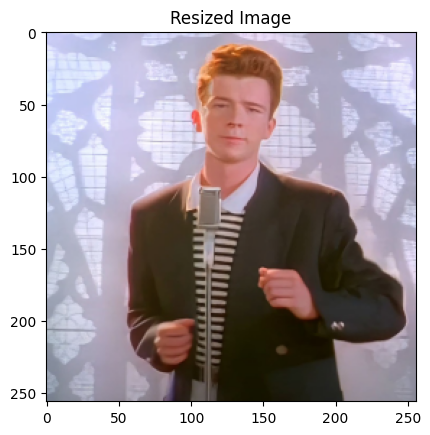

In [ ]:
# Resize image
resized = cv2.resize(img, (256, 256))
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
plt.title('Resized Image')
#plt.axis('off')
plt.show()

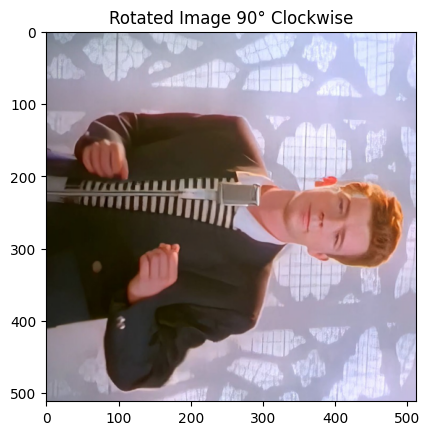

In [ ]:
# Rotate image 90 degrees clockwise
rotated = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image 90° Clockwise')
#plt.axis('off')
plt.show()

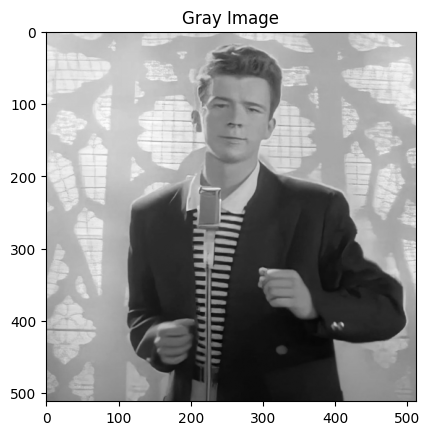

In [ ]:
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.title('Gray Image')
plt.show()

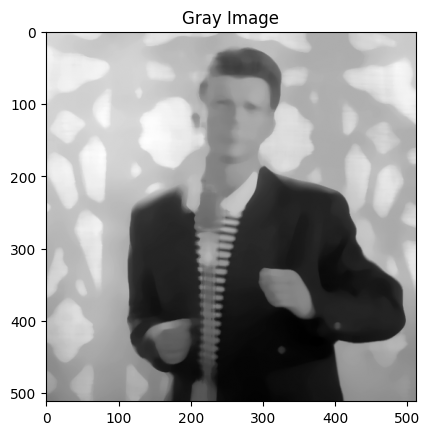

In [ ]:
# For every pixel in the image, replace its value with the median value of the intensities in the neighborhood of that pixel
median = cv2.medianBlur(gray, 15)
plt.imshow(median, cmap='gray')
plt.title('Gray Image')
plt.show()

 Median blur
Pros:
1. removes salt-and-pepper noise
2. edges are not blurred 

Cons: 
1. computationally expensive
2. not effective for Gaussian noise

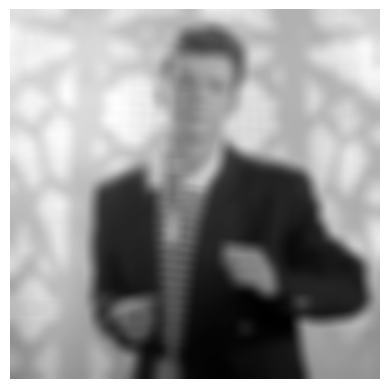

In [ ]:
# Gaussian blur
#The Gaussian filter smooths the image by averaging the pixel values with a Gaussian kernel.
blur = cv2.GaussianBlur(gray,(23,23),10)
plt.imshow(blur, cmap='gray')
plt.axis('off')
plt.show()

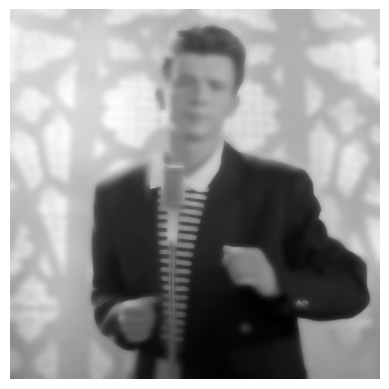

In [ ]:
# Have two weight coefficients.
# The first weight coefficient is the distance from the central pixel. The closer the pixel, the greater the weight.
# The second weight coefficient is the difference in intensity between the central pixel and the neighboring pixel.
# The smaller the difference, the greater the weight.
bilateral = cv2.bilateralFilter(gray, 15, 75, 75)
plt.imshow(bilateral, cmap='gray')
plt.axis('off')
plt.show()

The main difference between a bilateral filter and a Gaussian filter is that if a pixel is close to the central one but its brightness is very different (belonging to another object), this pixel won't be included in the averaging. This helps to preserve edges.

Pros:
1. Effective smoothing with edge preservation.
2. Good at noise reduction.

Cons:
1. Slower compared to other blurring methods.
2. Requires careful parameter tuning.

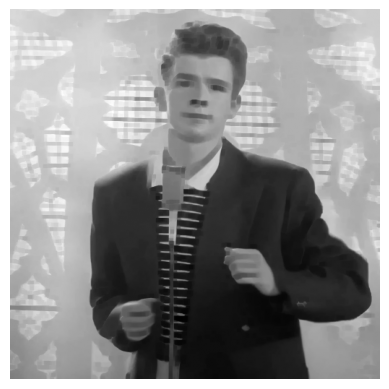

In [ ]:
# Erosion
# Removes pixels on object boundaries.
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
eroded = cv2.erode(gray, kernel, iterations=1)
plt.imshow(eroded, cmap='gray')
plt.axis('off')
plt.show()

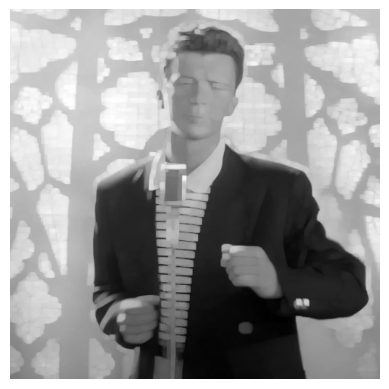

In [ ]:
# Dilation
# Adds pixels to the boundaries of objects in an image.
dilated = cv2.dilate(gray, kernel, iterations=1)
plt.imshow(dilated, cmap='gray')
plt.axis('off')
plt.show()

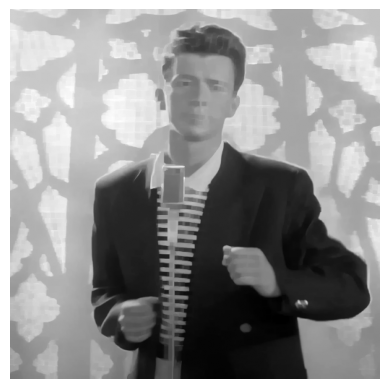

In [ ]:
# Closing
# Removes small holes inside the foreground objects, or small black points on the object.
closed = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
plt.imshow(closed, cmap='gray')
plt.axis('off')
plt.show()

# Gradient and contour

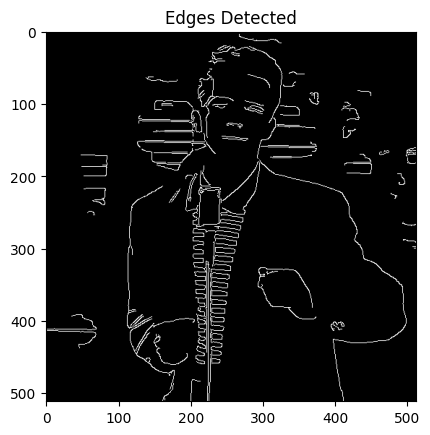

In [ ]:
# Find edges using Canny edge detector
edges = cv2.Canny(gray, 100, 250)
plt.imshow(edges, cmap='gray')
plt.title('Edges Detected')
#plt.axis('off')
plt.show()

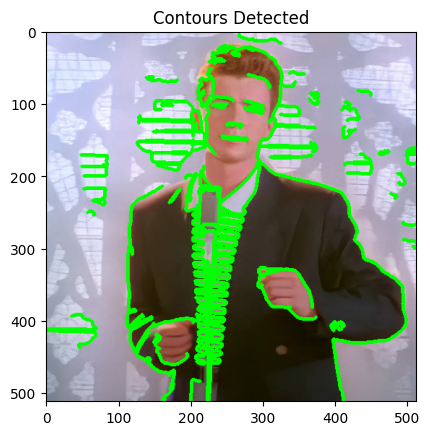

In [ ]:
# Detect contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_copy = img.copy()
cv2.drawContours(img_copy, contours, -1, (0, 255, 0), 3)

plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
plt.title('Contours Detected')
#plt.axis('off')
plt.show()

The Canny filter consists of several steps:
1. The image is smoothed using a Gaussian filter to prevent noise from being incorrectly identified as an edge. 
2. The image gradient is computed in both the X and Y. The gradient magnitude is then calculated as  $$ M =\sqrt{G_x^2 + G_y^2}$$ 
and the gradient direction is calculated as   $\theta$ = $\arctan(G_y/G_x)$  
3. Non-Maximum Suppression: If a pixel's gradient magnitude is not the maximum compared to its neighbors in the gradient's direction, it is suppressed (set to zero). This step thins the edges.
4. Two thresholds, a high one (threshold2) and a low one (threshold1), are used to finalize the edges.
    * If a pixel's gradient magnitude is above the high threshold (threshold2), it is considered a strong edge and is included in the final result. 
    * If the magnitude is below the low threshold (threshold1), it is discarded.
    * If the magnitude is between the two thresholds, it's considered a weak edge. Weak edges are only kept if they are connected to strong edges.

# My find contour

## Convolution

Convolution is
A filter kernel slides over the image, producing a new image as a result. The new values are obtained by element-wise multiplication of the matrix from the sliding window and the filter, followed by summing all the resulting elements.
There is a point that the new image may be smaller than the original one, or it may remain the same size. To make the output image the same size as the input, the original image needs to be padded.

1. You can add a constant around the image, which creates a border.

2. You can mirror the pixels.

3. You can reflect the pixels.

4. You can fill cyclically.

(np.float64(-0.5), np.float64(711.5), np.float64(711.5), np.float64(-0.5))

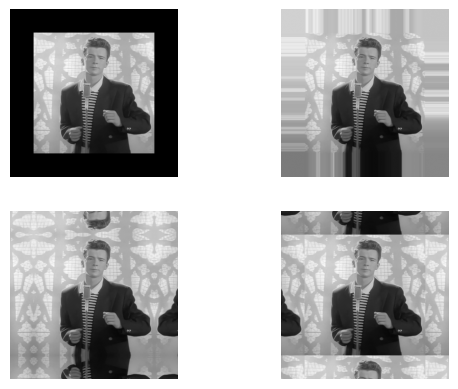

In [ ]:
# Padding
fig, axs = plt.subplots(2, 2)

axs[0,0].imshow(np.pad(gray, ((100, 100), (100, 100)), mode='constant'), cmap='gray')
axs[0,0].axis('off')

axs[1,0].imshow(np.pad(gray, ((100, 100), (100, 100)), mode='reflect'), cmap='gray')
axs[1,0].axis('off')

axs[0,1].imshow(np.pad(gray, ((100, 100), (100, 100)), mode='edge'), cmap='gray')
axs[0,1].axis('off')

axs[1,1].imshow(np.pad(gray, ((100, 100), (100, 100)), mode='wrap'), cmap='gray')
axs[1,1].axis('off')

In [ ]:
def convolve2d(image, kernel, pad_mode='reflect'):
    """Свертка изображения с ядром не меняя его размера"""
    # Check that the kernel has an odd size
    if kernel.shape[0] % 2 == 0 or kernel.shape[1] % 2 == 0:
        raise ValueError("Ядро должно иметь нечетный размер")
    
    # How much to pad the image
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Add padding to the image
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode=pad_mode)
    output = np.zeros_like(image, dtype=np.float32)
    
    kernel_flipped = np.flipud(np.fliplr(kernel))
    # perform convolution
    # slide over the new padded image, element-wise multiply the matrices and sum them up
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            output[i, j] = np.sum(padded_image[i:i + kernel_height, j:j + kernel_width] * kernel_flipped)
    
    return output

## My Gauss filter

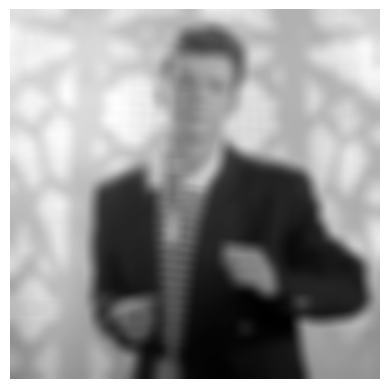

In [31]:
blur = cv2.GaussianBlur(gray,(23,23),10)
plt.imshow(blur, cmap='gray')
plt.axis('off')
plt.show()


The Gaussian filter consists of two steps:
1. Computing the Gaussian kernel.
This is a square matrix that defines how pixels influence the final result depending on their spatial position.
The central pixel has the maximum weight. The pixels adjacent to the center (left, right, top, bottom) have the same weight, slightly smaller than the center. The farther a pixel is from the center, the smaller its weight.
The matrix size can be any odd number (3×3, 5×5, etc.). The values are calculated using the one-dimensional Gaussian function and then normalized so that their sum equals 1:  $$ G(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-(\frac{x^2}{2 \sigma^2})}$$  For two dimensions, it is the product of two functions:
 $$ G(x,y) = \frac{1}{2 \pi \sigma^2} e^{-(\frac{x^2+y^2}{2 \sigma^2})} $$



 2. Performing the convolution.


### First

In [ ]:
def gaussian_kernel2d(size, sigma=1):
    """Create a Gaussian kernel."""
    kernel = np.zeros((size, size), dtype=np.float32)
    center = size // 2
    for x in range(size):
        for y in range(size):
            x_dist = x - center
            y_dist = y - center
            kernel[x, y] = (1 / (2 * np.pi * sigma**2)) * np.exp(-(x_dist**2 + y_dist**2) / (2 * sigma**2))
    # Normalize the kernel so that the sum of all elements is 1     
    kernel /= np.sum(kernel) 
    return kernel

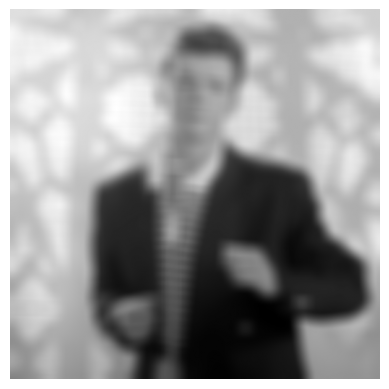

In [179]:
my_gauss_blur= convolve2d(gray, gaussian_kernel2d(23, sigma=10))
plt.imshow(my_gauss_blur, cmap='gray')
plt.axis('off')
plt.show()

In practical algorithms, the computation is done a bit differently:
1. At the first step, a one-dimensional kernel is generated using the formula above.
2. Then this kernel is applied sequentially to the rows and the columns.

In [155]:
sample = np.array([[0, 0, 0, 0, 0], 
                   [0, 0, 0, 0, 0], 
                   [0, 0, 225, 0, 0],
                   [0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0],], dtype=np.float32
                  )

In [ ]:
def gaussian_kernel(ksize, sigma=1):
    """Create a 1D Gaussian kernel."""
    kernel = np.zeros((ksize, 1), dtype=np.float32)
    center = ksize // 2
    for i in range(ksize):
        x = i - center
        kernel[i] = (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-(x**2) / (2 * sigma**2))
    # Normalize the kernel so that the sum of all elements is 1  
    kernel /= np.sum(kernel)  
    return kernel

#### Comparison with a one-dimensional kernel in OpenCV (cv2):

In [157]:
gaussian_kernel(5, sigma=1)

array([[0.05448868],
       [0.24420133],
       [0.40261996],
       [0.24420133],
       [0.05448868]], dtype=float32)

In [158]:
cv2.getGaussianKernel(ksize=5, sigma=1)

array([[0.05448868],
       [0.24420134],
       [0.40261995],
       [0.24420134],
       [0.05448868]])

#### Comparison with a my two-dimensional kernel:

In [159]:
np.outer(np.array(gaussian_kernel(5, sigma=1)), np.array(gaussian_kernel(5, sigma=1)))

array([[0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902],
       [0.01330621, 0.05963429, 0.09832033, 0.05963429, 0.01330621],
       [0.02193823, 0.09832033, 0.16210283, 0.09832033, 0.02193823],
       [0.01330621, 0.05963429, 0.09832033, 0.05963429, 0.01330621],
       [0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902]],
      dtype=float32)

In [160]:
gaussian_kernel2d(5, sigma=1)

array([[0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902],
       [0.01330621, 0.0596343 , 0.09832034, 0.0596343 , 0.01330621],
       [0.02193823, 0.09832034, 0.16210282, 0.09832034, 0.02193823],
       [0.01330621, 0.0596343 , 0.09832034, 0.0596343 , 0.01330621],
       [0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902]],
      dtype=float32)

#### Comparison with a blur in OpenCV (cv2):

In [161]:
convolve2d(convolve2d(sample, gaussian_kernel(5, sigma=1)).T, gaussian_kernel(5, sigma=1)).T

array([[ 2.672115 ,  5.9877944,  9.872205 ,  5.9877944,  2.672115 ],
       [ 5.9877944, 13.417716 , 22.122074 , 13.417716 ,  5.9877944],
       [ 9.872205 , 22.122074 , 36.473137 , 22.122074 ,  9.872205 ],
       [ 5.9877944, 13.417716 , 22.122074 , 13.417716 ,  5.9877944],
       [ 2.672115 ,  5.9877944,  9.872205 ,  5.9877944,  2.672115 ]],
      dtype=float32)

In [162]:
cv2.GaussianBlur(sample,(5,5),1)

array([[ 2.672115,  5.987795,  9.872205,  5.987795,  2.672115],
       [ 5.987795, 13.417718, 22.122076, 13.417718,  5.987795],
       [ 9.872205, 22.122076, 36.473137, 22.122076,  9.872205],
       [ 5.987795, 13.417718, 22.122076, 13.417718,  5.987795],
       [ 2.672115,  5.987795,  9.872205,  5.987795,  2.672115]],
      dtype=float32)

### Second

In [ ]:
def gaussian_blur(image, kernel_size=5, sigma=1):
    """Apply Gaussian blur to an image using a separable kernel."""
    # calculate one-dimensional kernel
    kernel1d = gaussian_kernel(kernel_size, sigma)
    # Applying the kernel to columns
    clo_conv = convolve2d(image, kernel1d)
    # Applying to rows after applying to columns via transposing and back transposing the image
    row_conv = convolve2d(clo_conv.T,kernel1d).T
    return row_conv

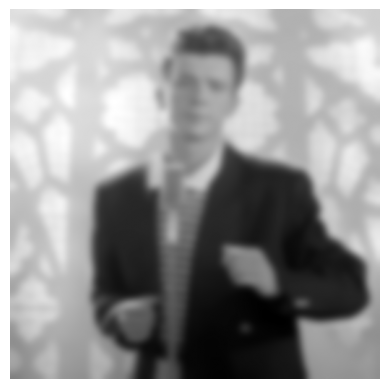

In [178]:
my_gauss_blur= gaussian_blur(gray, 23, 5)
plt.imshow(my_gauss_blur, cmap='gray')
plt.axis('off')
plt.show()

Another interesting point is that the kernel for the Gaussian filter can be found by approximation through Pascal's triangle.


In [245]:
pascal_triangle = np.array([1,4,6,4,1]) 
apr_gauss = np.outer(pascal_triangle, pascal_triangle)
apr_gauss

array([[ 1,  4,  6,  4,  1],
       [ 4, 16, 24, 16,  4],
       [ 6, 24, 36, 24,  6],
       [ 4, 16, 24, 16,  4],
       [ 1,  4,  6,  4,  1]])

It also has a maximum value in the center and fades out on the sides, since Pascal's triangle, when immersed downwards along the binomial coefficients through the central limit theorem, increasingly begins to resemble a normal distribution.


In [248]:
apr_gauss / sum(apr_gauss)

array([[0.0625, 0.0625, 0.0625, 0.0625, 0.0625],
       [0.25  , 0.25  , 0.25  , 0.25  , 0.25  ],
       [0.375 , 0.375 , 0.375 , 0.375 , 0.375 ],
       [0.25  , 0.25  , 0.25  , 0.25  , 0.25  ],
       [0.0625, 0.0625, 0.0625, 0.0625, 0.0625]])

Dividing by the sum is necessary for normalization

## My Sobel filter

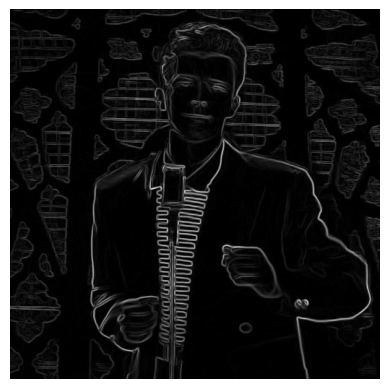

In [235]:
sobel_x_cv2 = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y_cv2 = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined_cv2 = cv2.magnitude(sobel_x_cv2, sobel_y_cv2)
plt.imshow(sobel_combined_cv2, cmap='gray')
plt.axis('off')
plt.show()

In [238]:
sobel_combined_cv2

array([[ 0.        , 10.        , 20.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.        , 10.19803903, 29.73213749, ...,  0.        ,
         0.        ,  0.        ],
       [ 8.        ,  5.83095189,  2.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  7.07106781,  4.47213595, ..., 12.16552506,
        11.66190379,  8.        ],
       [ 0.        ,  8.        ,  4.        , ..., 16.55294536,
        13.03840481,  6.        ],
       [ 0.        ,  8.        ,  4.        , ..., 16.        ,
        10.        ,  0.        ]], shape=(512, 512))

The Sobel filter is an edge detection operator for images. It consists of 4 steps:
1. Convert the image to grayscale.  
2. Convolve with the Sobel kernel.
The Sobel kernel is applied in both vertical and horizontal directions. In essence, it is one kernel (a matrix), but transposed for the other axis.

Conceptually, we try to measure how much the pixel above/left of the center differs from the pixel below/right of the center, depending on whether the filter is applied along the x- or y-axis.

It can be represented using two vectors:  $$ G(x) =\begin{pmatrix} -1\\0\\1 \end{pmatrix} * (1,2,1) = \begin{pmatrix} 
                                                                                                        -1& -2& -1 \\
                                                                                                        0& 0& 0\\
                                                                                                        1& 2& 1 \end{pmatrix}$$
In this example, it is the horizontal kernel.   
    The first vector is the differential, approximating the first derivative of the image intensity function.  
    The second vector increases the weights around the center for smoothing, similar to the Gaussian filter.  
    These smoothing values can be taken from Pascal’s triangle, or chosen manually.  
3. Compute the gradient.

In [ ]:
def sobel_kernel(direction='x', kernel_size=3, differentiation_kernel=None):
    # Default kernel 
    dict_differentiation_kernels = {
        3: [1,0,-1],
        5: [1,2,0,-2,-1],
        7: [1,6,15,0,-15,-6,-1]
    }
    averaging = {
        3: [1,2,1],
        5: [1,4,6,4,1],
        7: [1,6,15,20,15,6,1]
    }

    # Checking for a custom kernel
    diff_kernel_row = differentiation_kernel if differentiation_kernel is not None else dict_differentiation_kernels[kernel_size]
    kernel = np.outer(np.array(averaging[kernel_size]), np.array(diff_kernel_row))
        
    # Rotation of the core depending on the direction
    if direction == 'y':
        kernel = kernel.transpose()
        
    return kernel

In [ ]:
def calc_grad(image, kernel_size=3, differentiation_kernel=None):
    # Calculate gradient
    grad_x = convolve2d(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY),
                        sobel_kernel('x', kernel_size, differentiation_kernel))
    grad_y = convolve2d(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY),
                        sobel_kernel('y', kernel_size, differentiation_kernel))

    # Finding the gradient modulus
    gradient_L_two = np.sqrt(grad_x**2 + grad_y**2)

    # Finding the minimum and maximum value of the gradient
    min_value = np.min(gradient_L_two)
    max_value = np.max(gradient_L_two)

    # Normalize gradient for display
    gradient_L_two = (gradient_L_two - min_value) / (max_value - min_value) * 255
    gradient_L_two = gradient_L_two.astype(np.uint8)
    return gradient_L_two

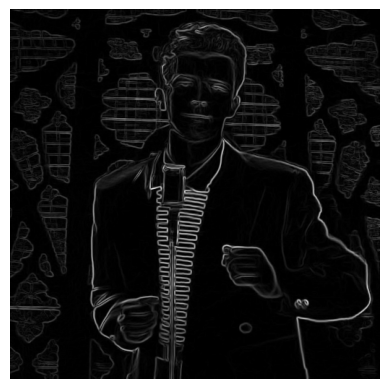

In [236]:
my_sobel_combined = calc_grad(img, kernel_size=3, differentiation_kernel=None)
plt.imshow(my_sobel_combined, cmap='gray')
plt.axis('off')
plt.show()

#### Function from cv2

In [ ]:
cv2.filter2D() # Applies the convolution operation
cv2.magnitude() # Finding the gradient modulus
cv2.normalize() # normalize

## My search for contours

In [ ]:
def threshold(image, kernel_size=3, differentiation_kernel=None, threshold=100):
    """threshold filter on image gradient"""
    binary_edges = calc_grad(image, kernel_size, differentiation_kernel)
    for i in range(binary_edges.shape[0]):
        for j in range(binary_edges.shape[1]):
            if binary_edges[i, j] > threshold:
                binary_edges[i, j] = 255
            else:
                binary_edges[i, j] = 0
    
    return binary_edges

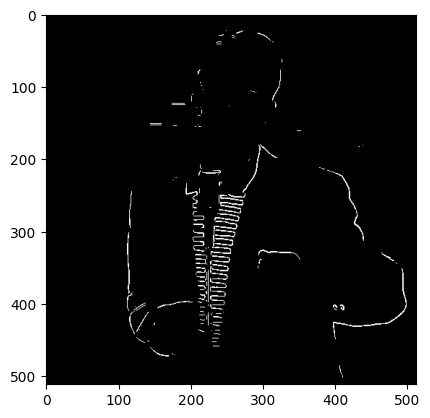

In [242]:
my_binar_threshold = threshold(img, kernel_size=3, threshold=110)
plt.imshow(my_binar_threshold, cmap='gray')